<a href="https://colab.research.google.com/github/omeralisyed/CODSOFT-Internship/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/IRIS.csv")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


pd.factorize(df["species"]):
Converts the categorical values in the column species into numeric codes

In [8]:
df['species'], categories = pd.factorize(df["species"])
#Each unique value in the species column is assigned a unique integer.
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.shape

(150, 5)

In [10]:
df.isnull().sum() #checking for null values

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Visualizing the Data

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

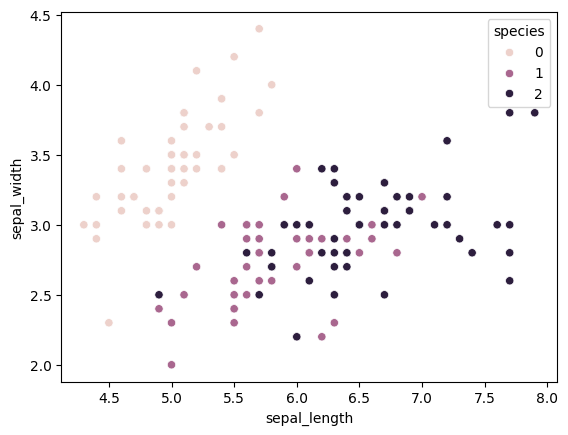

In [12]:
sns.scatterplot(data=df, x= 'sepal_length', y= 'sepal_width',hue="species" )

<Axes: xlabel='petal_length', ylabel='petal_width'>

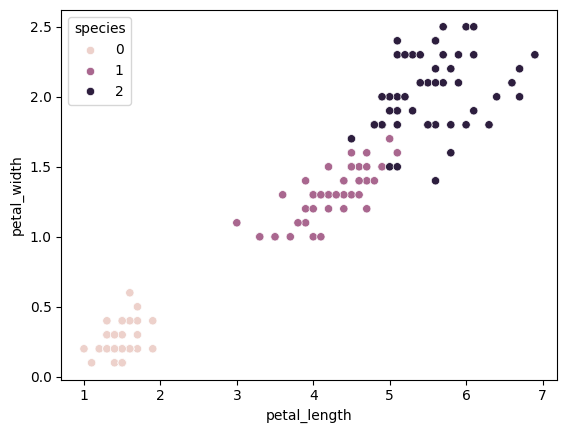

In [13]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

# Applying Elbow Technique

The elbow technique is used in clustering algorithms like K-Means to determine the optimal number of clusters (k) for your dataset. It helps identify the value of k where adding more clusters provides diminishing returns in terms of improvement.



In [14]:
from sklearn.cluster import KMeans
k_range = range(1,10) #range of values for the number of clusters (k) to test
sse = [] #empty list to store the Sum of Squared Errors (SSE)

for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal_length','petal_width']])
  sse.append(km.inertia_) #Calculates the inertia (SSE) for the current k and appends it to the sse list.


In [15]:
sse

[550.6434666666671,
 86.40394533570999,
 31.42928566827697,
 20.35223779069767,
 13.93330875790876,
 11.418808185111992,
 9.285916390614211,
 8.392559239453353,
 7.376024941005761]

Elbow Point: The value of k where the SSE sharply decreases and then levels off.
Use this value of k for clustering your dataset.
This approach ensures that the chosen number of clusters balances clustering quality and simplicity

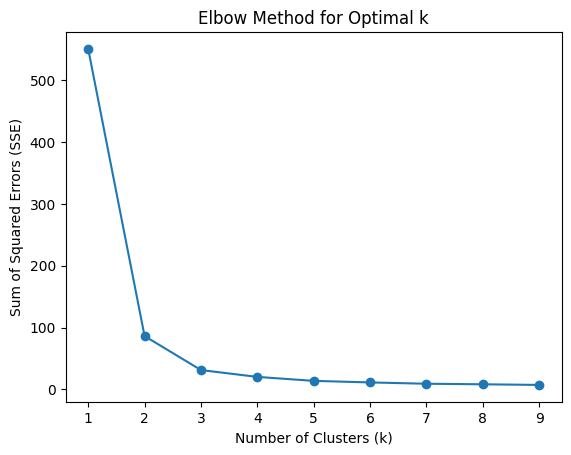

In [16]:
import matplotlib.pyplot as plt

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


# Applying K-means Algorithm

In [17]:
km = KMeans(n_clusters=3, random_state=0)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

This step is used to group similar data points together based on their petal_length and petal_width and analyze patterns in the clusters.

In [18]:
df["clusters"] = y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


# Accuracy Measure

In [21]:
from sklearn.metrics import confusion_matrix

df.species: The true labels, i.e., the actual species of each flower in the dataset.

df.clusters: The predicted cluster labels assigned by KMeans.

In [22]:
cm = confusion_matrix(df.species, df.clusters)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]])

Row 1 (species = Setosa): All Setosa points were grouped into Cluster 2.

Row 2 (species = Versicolor): Most Versicolor points are in Cluster 1, with a few in Cluster 3.

Row 3 (species = Virginica):  Most Virginica points are in Cluster 3, with a small number in Cluster 1.

# Visualizing Confusion Matrix

A heatmap showing:

Rows as true species (Setosa, Versicolor, Virginica).
Columns as predicted clusters (Cluster 1, Cluster 2, Cluster 3).

Cell values representing the count of points falling into each true-predicted pair.

This plot provides a quick way to assess the alignment of clusters with the actual species.

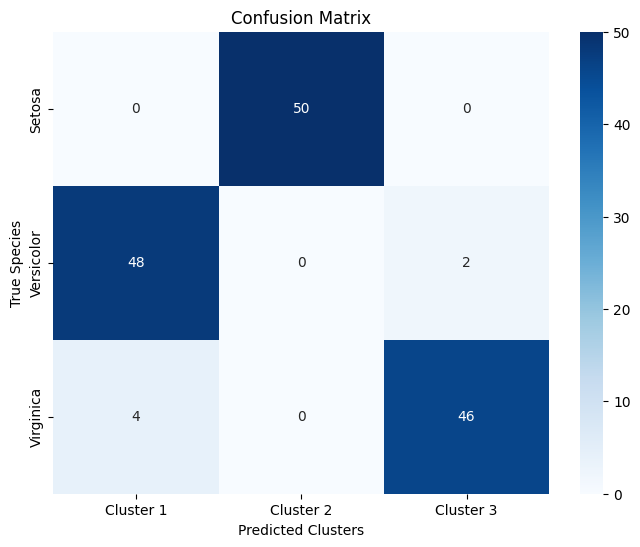

In [23]:
# Compute the confusion matrix
cm = confusion_matrix(df.species, df.clusters)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
# annot=True: Displays the numbers in the heatmap cells. fmt='d': Ensures numbers are shown as integers.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cluster 1", "Cluster 2", "Cluster 3"], yticklabels=["Setosa", "Versicolor", "Virginica"])
# xticklabels and yticklabels: Labels for the predicted clusters and true species for clarity.
plt.xlabel('Predicted Clusters')
plt.ylabel('True Species')
plt.title('Confusion Matrix')
plt.show()